# Reproduction notebook for the radio, IR, and H$\alpha$ images in "Radio detections of IR-selected runaway stellar bow shocks" by Van den Eijnden et al. (2022)

### Table of contents for this notebook:

- Step 0: Loading python packages and basic plotting settings
- Step 1: Plotting Figures 1 and 2: the radio and IR images of NGC 6357 and three bow shocks in this field
- Step 2: Plotting Figures 3 and 4: the radio and IR images of RCW 49 and the three bow shocks in this field
- Step 3: Plotting Figure 5: the radio and IR images of HIP 88652 and K5
- Step 4: Plotting Figure 6: the radio and IR images of HIP 98418 and HIP 38430
- Step 5: Plotting Figure 7: the radio and IR images of HIP 24575
- Step 6: Plotting Figure 11: the H$\alpha$ images of G1 and G3

### This code uses the following python packages and versions:

numpy v1.15.4

matplotlib v2.2.3

aplpy v1.1.1

scipy v1.1.0

astropy v2.0.9

# Step 0: loading python packages and basic plotting settings

### Setting the path for the font to use in plotting labels and texts:

In [1]:
# Make sure to change this path to your local version, or otherwise comment out the noted line in the next cell
path = '/Library/Fonts/Arial Unicode.ttf'

### Loading the packages and setting up plots

In [2]:
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.gridspec as gridspec
from matplotlib import colors
import aplpy

from scipy import interpolate
from scipy import optimize
from scipy.integrate import quad
import scipy.special

import os
from astropy import units as u
from astropy.io import fits
from astropy.units import cds
cds.enable()  

# If the font should not be changed, comment out the next two lines:
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['pdf.fonttype']=42

params = {'text.usetex':False, 'mathtext.fontset':'custom', 'mathtext.default':'regular'}
mpl.rcParams.update(params)

single_col = 8.9 # cm
double_col = 18.33 # cm
def cm2inch(value):
    return value/2.54
FS = 22
LS = 22
MS = 14
MEW= 1.5

%matplotlib inline

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### A general note regarding all figures

One may also notice how all radio images are plotted on a logarithmic flux scale, while the WISE / IR images are show on a linear scale. This decision was similarly made as it best highlights the relevant structures in the images.

Any of the plotted region files were constructed beforehand using DS9. We refer the reader to the paper for definitions of their construction and the used fields (i.e. radio or IR), which differ per region.

# Step 1: Plotting Figures 1 and 2: the radio and IR images of NGC 6357 and three bow shocks in this field

Note that for the actual Figures 1 and 2 in the paper, we use the images created below in a combined, composite image. This composite image is created using other software, for which many options are available (e.g. photoshop or powerpoint). The final versions of the composite images is included in this reproduction package, but we leave the combination step as a proverbial 'exercise to the reader'. 

### The full field image:

In most plots below, we will define the VMIN and VMAX parameters explicitly. These values set the minimum and maximum flux density for the image, and are determined manually in order to produce the clearest image highlighting the relevant structures and sources.

In [3]:
VMIN = 1e-3
VMAX = 5e-1

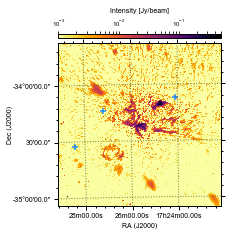

In [19]:
# Set the colormap
CM = 'inferno_r' 

# Define the .fits file with the image
data = "./Figure1_2/allG.fits"

# Define the image and the size:
fig = plt.figure(figsize=(cm2inch(single_col),cm2inch(single_col)))
plt.clf()

# Plot the map in the defined figure
cg = aplpy.FITSFigure(data, figure=fig, subplot=(1,1,1))

# Define the colormaps, min and max flux on the log scale: 
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# Centre on this position:
ra = 261.410271
dec = -34.356656
    
cg.recenter(ra, dec, radius=0.72)  # radius of the image in degrees

# Mark the positions of the three bow shocks:
cg.show_markers(262.110417, -34.547835, layer='marker_set_1', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # G3

cg.show_markers(261.801833, -34.231750, layer='marker_set_2', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # G1

cg.show_markers(261.023192, -34.118722, layer='marker_set_3', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # G8
    
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00338748872104271 * u.degree)
cg.beam.set_minor(0.00321562640412456 * u.degree)
cg.beam.set_angle(-70.787 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Set the properties of the axis labels and ticks:
cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')
cg.ticks.set_xspacing(0.5)  # degrees
cg.ticks.set_yspacing(0.5)

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

# To define a colorbar properly, we create a fake axis and plot an empty dataset with imshow (with the same range
# and colormap as the real image)
ax = fig.add_subplot(111)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

# Making the colorbar using the 'empty' imshow image.
cb = plt.colorbar(orientation='horizontal', cmap=CM, shrink=1, aspect=40, pad=0, 
                  fraction=0.92,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=6) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

# Save the image:
plt.tight_layout()
plt.savefig('./Figure1_2/Gfield.png', dpi=500)

### The three insets for G1, G3, and G8

### G1

In [20]:
VMIN = 1e-3
VMAX = 8.0e-3

 [astropy.io.fits.verify]


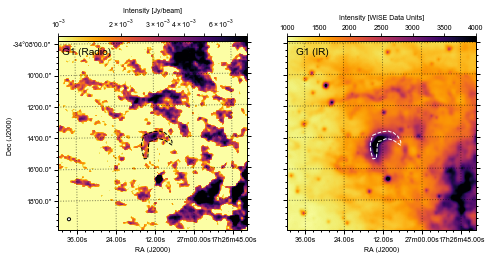

In [21]:
CM = 'inferno_r' 

# Reading in the data: RACS and WISE.
data1 = "./Figure1_2/G1zoom.fits"
data2 = "./Figure1_2/W3-G1.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))

plt.clf()

# Defining the bold face for the name of the field in the top left:
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.15, 0.76, 'G1 (Radio)', fontsize=10, fontproperties=font)
fig.text(0.6, 0.76, 'G1 (IR)', fontsize=10, fontproperties=font)

###################################################################################################################
# Plotting the radio image in the left panel, on a log scale:
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# centre on this position:
ra = 261.801833
dec = -34.231750

cg.recenter(ra, dec, radius=0.1)  # radius in degrees: the insets are 0.2 by 0.2 degrees.
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00338748872104271 * u.degree)
cg.beam.set_minor(0.00321562640412456 * u.degree)
cg.beam.set_angle(-70.787 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure1_2/BS_G1.image.reg')

# Set the properties of the frame and the labels, as well as the grid:
cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
# Plot the right panel, on a linear scale, with the second data set (i.e. WISE)

cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=1000.0,vmax=4000.0)
cg2.ticks.set_color('black')

# Align on the same centre position and size:
cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure1_2/BS_G1.image.WISE.reg')

# Set the properties of the frame and the labels, as well as the grid:
cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
# Create the color bar for the left panel

ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
# Create the color bar for the right panel

ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1000.0,vmax=4000,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################

# Save the image:
plt.tight_layout()
plt.savefig('./Figure1_2/G1.BOTH.png', dpi=500)

### G3

In [22]:
VMIN = 1e-3
VMAX = 6e-3

The cell below works the same as for G1 above -- see there for comments

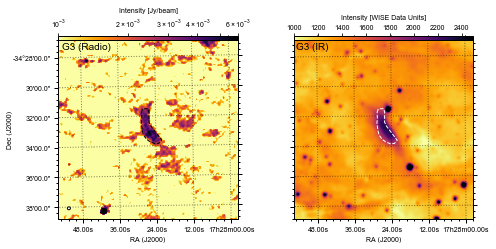

In [23]:
CM = 'inferno_r' 

data1 = "./Figure1_2/G3zoom.fits"
data2 = "./Figure1_2/W3_G3-2.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.15, 0.77, 'G3 (Radio)', fontsize=10, fontproperties=font)
fig.text(0.6, 0.77, 'G3 (IR)', fontsize=10, fontproperties=font)

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# best radio position: centre on this
ra = 262.110417
dec = -34.547835

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00338748872104271 * u.degree)
cg.beam.set_minor(0.00321562640412456 * u.degree)
cg.beam.set_angle(-70.787 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure1_2/BS_G3.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=1000.0,vmax=2500.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure1_2/BS_G3.image.WISE.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1000.0,vmax=2500,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure1_2/G3.BOTH.png', dpi=500)

### G8

In [24]:
VMIN = 1.0e-4
VMAX = 1e-1

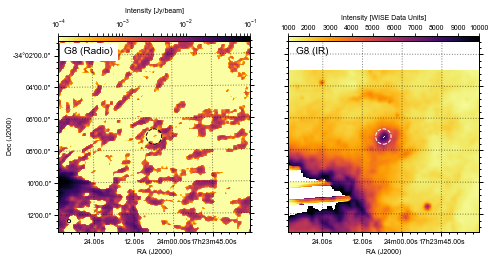

In [25]:
CM = 'inferno_r' 

data1 = "./Figure1_2/G8zoom.fits"
data2 = "./Figure1_2/W3-G8.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.155, 0.765, 'G8 (Radio)', fontsize=10, fontproperties=font, backgroundcolor='w')
fig.text(0.6, 0.765, 'G8 (IR)', fontsize=10, fontproperties=font)

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# best radio position: centre on this
ra = 261.023192
dec = -34.118722

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00338748872104271 * u.degree)
cg.beam.set_minor(0.00321562640412456 * u.degree)
cg.beam.set_angle(-70.787 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure1_2/BS_G8.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=1000.0,vmax=10000.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure1_2/BS_G8.image.WISE.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1000.0,vmax=10000,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure1_2/G8.BOTH.png', dpi=500)

# Step 2: Plotting Figures 3 and 4: the radio and IR images of RCW 49 and the three bow shocks in this field

The general comments about Figures 1 and 2 also hold for Figures 3 and 4.

### The full field image:

In [47]:
VMIN = 1e-3
VMAX = 1.0

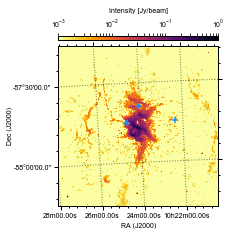

In [49]:
# Set the colormap
CM = 'inferno_r'

# Define the .fits file with the image
data = "./Figure3_4/largefield.fits"

# Define the image and the size:
fig = plt.figure(figsize=(cm2inch(single_col),cm2inch(single_col)))
plt.clf()

# Plot the map in the defined figure
cg = aplpy.FITSFigure(data, figure=fig, subplot=(1,1,1))

# Define the colormaps, min and max flux on the log scale: 
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# centre on this position:
ra = 156.028333
dec = -57.770806
    
cg.recenter(ra, dec, radius=0.5)  # radius in degrees

# Mark the positions of the three bow shocks with crosses:
cg.show_markers(155.594333, -57.743472, layer='marker_set_1', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # S1 

cg.show_markers(156.156250, -57.751778, layer='marker_set_2', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # S3 

cg.show_markers(156.013000, -57.643333, layer='marker_set_3', 
                edgecolor=None, facecolor='dodgerblue', marker='+', s=35) # S2

# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00377385619567321 * u.degree)
cg.beam.set_minor(0.00325085031460018 * u.degree)
cg.beam.set_angle(6.757 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Set the properties of the axis labels and ticks:
cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')
cg.ticks.set_xspacing(0.5)  # degrees
cg.ticks.set_yspacing(0.5)

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

# To define a colorbar properly, we create a fake axis and plot an empty dataset with imshow (with the same range
# and colormap as the real image)
ax = fig.add_subplot(111)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

# Making the colorbar using the 'empty' imshow image.
cb = plt.colorbar(orientation='horizontal', cmap=CM, shrink=1, aspect=40, pad=0, 
                  fraction=0.92,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

# Save the figure:
plt.tight_layout()
plt.savefig('./Figure3_4/RCW49_field.png', dpi=500)

### The three insets for S1, S2, and S3

### S1

In [28]:
VMIN = 1e-3
VMAX = 20.0e-3

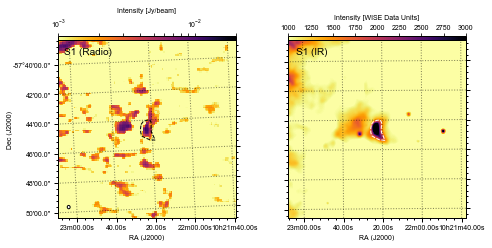

In [29]:
CM = 'inferno_r' # binary

data1 = "./Figure3_4/largefield.fits"
data2 = "./Figure3_4/W3-RCW49_S1.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(single_col)))
plt.clf()    

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.155, 0.75, 'S1 (Radio)', fontsize=10, fontproperties=font)
fig.text(0.6, 0.75, 'S1 (IR)', fontsize=10, fontproperties=font)

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=1e-3,vmax=VMAX, stretch='log')

# Centre on this:
ra = 155.594333
dec = -57.743472

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00377385619567321 * u.degree)
cg.beam.set_minor(0.00325085031460018 * u.degree)
cg.beam.set_angle(6.757 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure3_4/BS_S1.image2.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=1000.0,vmax=3000.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure3_4/BS_S1.image.WISE.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1e-3,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1000.0,vmax=3000,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.95,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure3_4/S1.BOTH.png', dpi=500)

### S2 and S3 (only radio)

In [30]:
s_composite = False

In [31]:
VMIN = 1e-3
VMAX = 200.0e-3

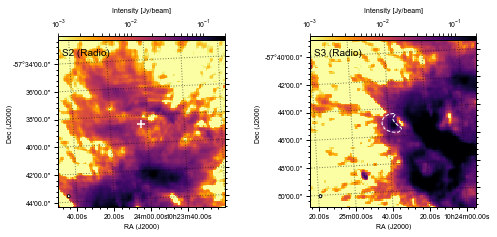

In [32]:
CM = 'inferno_r' # binary

data1 = "./Figure3_4/largefield.fits"
data2 = "./Figure3_4/largefield.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(single_col)))
plt.clf()    

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.15, 0.74, 'S2 (Radio)', fontsize=10, fontproperties=font)
fig.text(0.635, 0.74, 'S3 (Radio)', fontsize=10, fontproperties=font)


###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=1e-3,vmax=VMAX, stretch='log')

# Centre on this position:
ra = 156.013000
dec = -57.643333

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00377385619567321 * u.degree)
cg.beam.set_minor(0.00325085031460018 * u.degree)
cg.beam.set_angle(6.757 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show source position (no region!)
cg.show_markers(156.013000, -57.643333, layer='marker_set_3', 
                edgecolor=None, facecolor='w', marker='+', s=50) 

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=1e-3,vmax=VMAX, stretch='log')
cg2.ticks.set_color('black')

# best radio position: centre on this
ra = 156.156250
dec = -57.751778

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg2.add_beam()
cg2.beam.show()
cg2.beam.set_major(0.00377385619567321 * u.degree)
cg2.beam.set_minor(0.00325085031460018 * u.degree)
cg2.beam.set_angle(6.757 * u.degree)
cg2.beam.set_corner('bottom left')
cg2.beam.set_linestyle('-')
cg2.beam.set_edgecolor('k')
cg2.beam.set_facecolor('w')
cg2.beam.set_linewidth(1)    
    
# Show source:
cg2.show_regions('./Figure3_4/BS_S3.image2.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1e-3,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
            fraction=0.905,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=1e-3,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
            fraction=0.905,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################

plt.tight_layout()
plt.savefig('./Figure3_4/S2.AND.S3.png', dpi=500)

# Step 3: Plotting Figure 5: the radio and IR images of HIP 88652 and K5

### HIP 88652

In [35]:
VMIN = 3e-4
VMAX = 2.5e-3

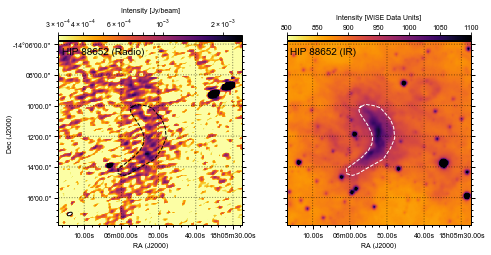

In [36]:
CM = 'inferno_r'

data1 = "./Figure5/HIP88652_zoom.fits"
data2 = "./Figure5/W3-HIP88652.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig.text(0.15, 0.76, 'HIP 88652 (Radio)', fontsize=10, fontproperties=font, color='k')
fig.text(0.59, 0.76, 'HIP 88652 (IR)', fontsize=10, fontproperties=font, color='k')

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# centre on the position below:
ra = 271.467500
dec = -14.196242

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00574774731967295 * u.degree)
cg.beam.set_minor(0.00326992448486686 * u.degree)
cg.beam.set_angle(-64.9116241032185 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure5/BS.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=800.0,vmax=1100.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure5/BS_HIP88652.image2.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.935,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=800.0,vmax=1100,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.935,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure5/HIP88652.BOTH.png', dpi=500)

### K5

In [37]:
VMIN = 1e-3
VMAX = 2e-2

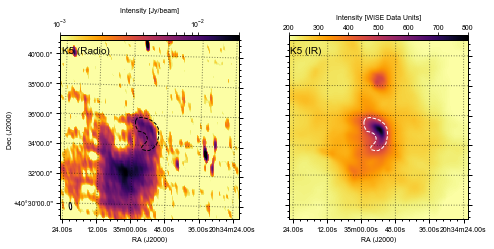

In [38]:
CM = 'inferno_r'

data1 = "./Figure5/K5_zoom.fits"
data2 = "./Figure5/W4-K5.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig.text(0.15, 0.76, 'K5 (Radio)', fontsize=10, fontproperties=font, color='k')
fig.text(0.59, 0.76, 'K5 (IR)', fontsize=10, fontproperties=font, color='k')

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN, vmax=VMAX, stretch='log')

# centre on the position below:
ra = 308.725296
dec = 40.584694

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.008147193500251121 * u.degree)
cg.beam.set_minor(0.0027105480183845 * u.degree)
cg.beam.set_angle(6.71412354587358 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure5/BS_K5.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=200.0,vmax=800.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure5/BS_K5.image.WISE.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.91,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=200.0,vmax=800,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.91,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure5/K5.BOTH.png', dpi=500)

# Step 4: Plotting Figure 6: the radio and IR images of HIP 98418 and HIP 38430

### HIP 98418

In [39]:
VMIN = 2e-3
VMAX = 0.8e-2

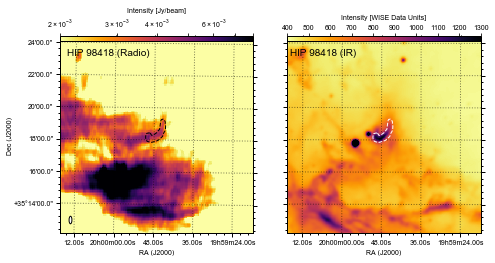

In [40]:
CM = 'inferno_r' 

data1 = "./Figure6/BS_zoom.HIP98418.fits"
data2 = "./Figure6/W3-HIP98418.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig.text(0.16, 0.76, 'HIP 98418 (Radio)', fontsize=10, fontproperties=font, color='k')
fig.text(0.59, 0.76, 'HIP 98418 (IR)', fontsize=10, fontproperties=font, color='k')

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# best radio position: centre on this
ra = 299.946667
dec = 35.303972

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00782056218749828 * u.degree)
cg.beam.set_minor(0.00292147048295767 * u.degree)
cg.beam.set_angle(-0.298679096072852 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure6/BS_HIP98418.RACS.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=400.0,vmax=1300.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure6/BS_HIP98418.image.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=400.0,vmax=1300,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure6/HIP98418.BOTH.png', dpi=500)

### HIP 38430

In [41]:
VMIN = 15e-3
VMAX = 0.3e-1

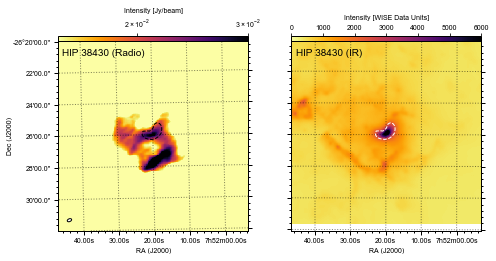

In [42]:
CM = 'inferno_r'

data1 = "./Figure6/BS_zoom.HIP38430.fits"
data2 = "./Figure6/W3-HIP38420.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig.text(0.15, 0.76, 'HIP 38430 (Radio)', fontsize=10, fontproperties=font, color='k')
fig.text(0.60, 0.76, 'HIP 38430 (IR)', fontsize=10, fontproperties=font, color='k')

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# best radio position: centre on this
ra = 118.082917
dec = -26.434583

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00479585263892906 * u.degree)
cg.beam.set_minor(0.00292312057020246 * u.degree)
cg.beam.set_angle(-67.18329535243601 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure6/BS_HIP38430.RACS.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=000.0,vmax=6000.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure6/BS_HIP38430.image.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=000.0,vmax=6000,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.955,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure6/HIP38430.BOTH.png', dpi=500)

# Step 5: Plotting Figure 7: the radio and IR images of HIP 24575

In [43]:
VMIN = 7e-4
VMAX = 6e-3

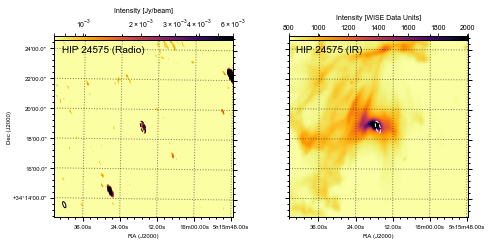

In [44]:
CM = 'inferno_r' 

data1 = "./Figure7/field.fits"
data2 = "./Figure7/W3-HIP24575.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(1.05*single_col)))
plt.clf()

from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')
fig.text(0.15, 0.76, 'HIP 24575 (Radio)', fontsize=10, fontproperties=font, color='k')
fig.text(0.60, 0.76, 'HIP 24575 (IR)', fontsize=10, fontproperties=font, color='k')

###################################################################################################################
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=VMIN,vmax=VMAX, stretch='log')

# best radio position: centre on this
ra = 79.070000
dec = 34.313389

cg.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(0.00718566407461206 * u.degree)
cg.beam.set_minor(0.00290206609243621 * u.degree)
cg.beam.set_angle(21.2112613950271 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Show region:
cg.show_regions('./Figure7/BS.image.reg')

cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=6, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=6, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=800.0,vmax=2000.0)
cg2.ticks.set_color('black')

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure7/BS_HIP24575.image.reg')

cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=6, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=6, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################
ax = fig.add_subplot(121)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=VMIN,vmax=VMAX,cmap=CM,rasterized=True,norm=colors.LogNorm())

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.895,drawedges=True)

cb.set_label(r'Intensity [Jy/beam]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
ax.axis('off')

###################################################################################################################
ax = fig.add_subplot(122)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=800.0,vmax=2000,cmap=CM,rasterized=True)

cb = plt.colorbar(orientation='horizontal', cmap='inferno_r',shrink=1.0, aspect=40, pad=0, 
                  fraction=0.895,drawedges=True)

cb.set_label(r'Intensity [WISE Data Units]', fontsize=7, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=7) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

###################################################################################################################
plt.tight_layout()
plt.savefig('./Figure7/Figure7.png', dpi=500)

# Step 6: Plotting Figure 11: the H$\alpha$ images of G1 and G3

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


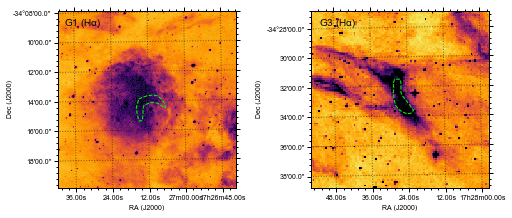

In [45]:
CM = 'inferno_r' 

# Reading in the data: RACS and WISE.
data1 = "./Figure11/ha_G1_2.fits"
data2 = "./Figure11/ha_G3_2.fits"

fig = plt.figure(figsize=(cm2inch(double_col),cm2inch(single_col)))

plt.clf()

# Defining the bold face for the name of the field in the top left:
from matplotlib.font_manager import FontProperties
font0 = FontProperties()
font = font0.copy()
font.set_weight('bold')

fig.text(0.13, 0.82, r'G1 (H$\alpha$)', fontsize=10, fontproperties=font)
fig.text(0.62, 0.82, r'G3 (H$\alpha$)', fontsize=10, fontproperties=font)

###################################################################################################################
# Plotting the radio image in the left panel, on a log scale:
cg = aplpy.FITSFigure(data1, figure=fig, subplot=(1,2,1))
cg.show_colorscale(cmap=CM,vmin=1700,vmax=15000)

# centre on the position of G1
ra = 261.801833
dec = -34.231750

cg.recenter(ra, dec, radius=0.1)  # radius in degrees: the insets are 0.2 by 0.2 degrees.
 
# Show region:
cg.show_regions('./Figure11/BS_G1.image.reg')

# Set the properties of the frame and the labels, as well as the grid:
cg.axis_labels.set_xpad(4)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(4)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

###################################################################################################################
# Plot the right panel, on a linear scale, with the second data set (i.e. WISE)

cg2 = aplpy.FITSFigure(data2,figure=fig, subplot=(1,2,2))
cg2.show_colorscale(cmap=CM,vmin=3000,vmax=8000)
cg2.ticks.set_color('black')

# Position of G3:
ra = 262.110417
dec = -34.547835

cg2.recenter(ra, dec, radius=0.1)  # radius in degrees
 
# Show region:
cg2.show_regions('./Figure11/BS_G3.image.reg')

# Set the properties of the frame and the labels, as well as the grid:
cg2.axis_labels.set_xpad(4)
cg2.axis_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.tick_labels.set_font(size=7, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg2.ticks.set_length(4)
cg2.ticks.set_linewidth(1)
cg2.ticks.set_color('black')

cg2.frame.set_linewidth(1)  # points
cg2.frame.set_color('black')

#cg2.tick_labels.hide_y()
#cg2.axis_labels.hide_y()

cg2.add_grid()
cg2.grid.show()
cg2.grid.set_color('k')
cg2.grid.set_linestyle(':')
cg2.grid.set_linewidth(1)

###################################################################################################################

# Save the image:
plt.tight_layout()
plt.savefig('./Figure11/Figure11.png', dpi=500)